## 영상의 화소 처리 기법

(<Axes: title={'center': 'plus'}>,
 Text(0.5, 1.0, 'plus'),
 (0.0, 1.0, 0.0, 1.0),
 <matplotlib.image.AxesImage at 0x1b9d1370830>)

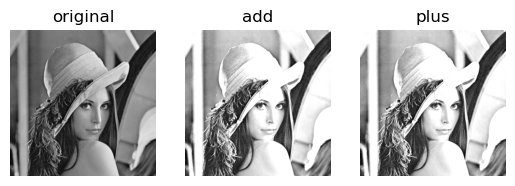

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

src = cv2.imread('lenna.bmp', cv2.IMREAD_GRAYSCALE)

dst1 = cv2.add(src, 100)
dst2 = src + 100
dst2 = np.clip(src + 100., 0, 255).astype(np.uint8) # 이게 없으면 이상해짐

plt.subplot(131), plt.title('original'), plt.axis('off'), plt.imshow(src, cmap='gray')
plt.subplot(132), plt.title('add'), plt.axis('off'), plt.imshow(dst1, cmap='gray')
plt.subplot(133), plt.title('plus'), plt.axis('off'), plt.imshow(dst2, cmap='gray')


### 이미지 연산
- cv2.add(src1, src2) : 픽셀별 덧셈 연산, 255를 초과하는 값은 255로 클램핑 처리, 밝기 증가, 두 이미지 합성 효과
- cv2.addWeighted(src1, 0.5, src2, 0.5, 0.0) : 가중 평균 합성, 두 이미지를 0.5:0.5 비율로 섞기, 자연스러운 합성 효과
- cv2.subtract(src1, src2) : 픽셀별 덧셈 연산, 결과가 0보다 작으면 0으로 처리됨, 어두운 배경에서 밝은 객체 강조
- cv2.absdiff(src1, src2) : 절대값 차이, 변화 영역 감지에 유용

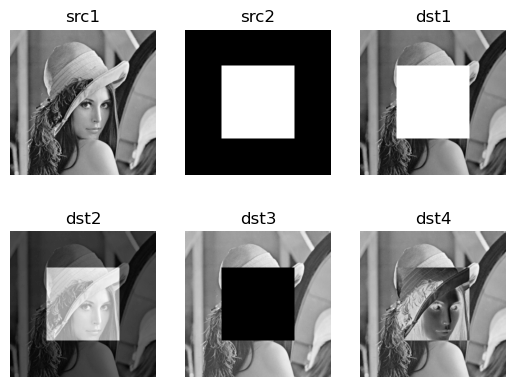

In [10]:
import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt

src1 = cv2.imread('lenna256.bmp', cv2.IMREAD_GRAYSCALE)
src2 = cv2.imread('square.bmp', cv2.IMREAD_GRAYSCALE)

if src1 is None or src2 is None:
    print('Image load failed')
    sys.exit()
    
dst1 = cv2.add(src1, src2, dtype=cv2.CV_8U)
dst2 = cv2.addWeighted(src1, 0.5, src2, 0.5, 0.0)
dst3 = cv2.subtract(src1, src2)
dst4 = cv2.absdiff(src1, src2)

plt.subplot(231), plt.axis('off'), plt.title('src1'), plt.imshow(src1, 'gray')
plt.subplot(232), plt.axis('off'), plt.title('src2'), plt.imshow(src2, 'gray')
plt.subplot(233), plt.axis('off'), plt.title('dst1'), plt.imshow(dst1, 'gray')
plt.subplot(234), plt.axis('off'), plt.title('dst2'), plt.imshow(dst2, 'gray')
plt.subplot(235), plt.axis('off'), plt.title('dst3'), plt.imshow(dst3, 'gray')
plt.subplot(236), plt.axis('off'), plt.title('dst4'), plt.imshow(dst4, 'gray')
plt.show()